In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('appl_1980_2014.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

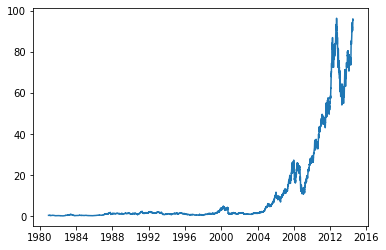

In [6]:
plt.plot(df['Date'], df['Adj Close'])
plt.show()

In [7]:
df['week'] = df['Date'].dt.week

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,week
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,28
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,28
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,27
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,27
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,27


In [9]:
df['day'] = df['Date'].dt.day

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,week,day
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,28,8
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,28,7
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,27,3
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,27,2
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,27,1


In [11]:
df['day_year'] = df['Date'].dt.dayofyear

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,week,day,day_year
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,28,8,189
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,28,7,188
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,27,3,184
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,27,2,183
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,27,1,182


In [13]:
df['day_of_week'] = df['Date'].dt.dayofweek

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,week,day,day_year,day_of_week
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,28,8,189,1
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,28,7,188,0
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,27,3,184,3
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,27,2,183,2
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,27,1,182,1


In [15]:
df.to_csv('updated_stock.csv')

In [16]:
X = df[['Open','High','Low']].values
y = df['Close'].values

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
y = y.reshape((-1,1))

In [19]:
minmax = MinMaxScaler()
X = minmax.fit_transform(X)
y = minmax.fit_transform(y)

In [20]:
X[0]

array([0.12317551, 0.12346711, 0.12042349])

In [21]:
y[0]

array([0.1220518])

In [22]:
n = len(X)
x0 = np.ones(n)

In [23]:
X = np.c_[x0,X]

In [24]:
X.shape

(8465, 4)

In [25]:
X[0]

array([1.        , 0.12317551, 0.12346711, 0.12042349])

In [26]:
b = np.zeros(X.shape[1])

In [27]:
def cost(x,y,b):
    return (1/n) * (np.sum((x.dot(b) - y) ** 2))

In [28]:
cost(X,y,b)

492.5601810808656

In [29]:
def gradient(x,y,b,epochs,alpha):
    cost_history = []
    for i in range(epochs):
        y_pred = np.dot(x,b)
        loss = y_pred - y
        grad_b = (2/n) * loss.T.dot(x)
        b = b - grad_b * alpha
        cost_history.append(cost(x,y,b))
    return cost_history, b

In [30]:
# early stopping - technique to prevent overfitting
epochs = 300
alpha = 0.01
b = np.zeros(X.shape[1])
cost_history, b = gradient(X,y.flatten(),b,epochs,alpha)

In [31]:
cost_history[-1]

0.008921690507739529

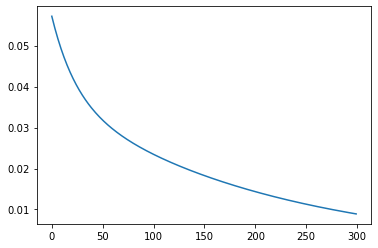

In [32]:
x_axis = list(range(epochs))
plt.plot(x_axis, cost_history)
plt.show()

In [33]:
minmax.inverse_transform(y)

array([[95.35],
       [95.97],
       [94.03],
       ...,
       [25.25],
       [27.25],
       [28.75]])

In [35]:
# minmax.inverse_transform(X)